In [1]:
import time

import numpy as np
import pylab as pl

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [2]:
record= pd.read_csv("Desktop/Carnivore_Reseach/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]
rec19.count()

Time_Seen    3008
Species      3008
Latitude     3008
Longitude    3008
Media        3008
Month        3008
Hour         3008
Year         3008
dtype: int64

In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

In [10]:
rec19_king.count()

Latitude     1340
Longitude    1340
dtype: int64

In [11]:
coyo19_scaled = StandardScaler().fit_transform(rec19_coyo)

In [12]:
coyo19king_scaled = StandardScaler().fit_transform(rec19_king)

In [13]:
coyo19_kmeans3 = KMeans(n_clusters=3)
coyo19_kmeans3.fit(coyo19_scaled)

coyo19_kmeans4 = KMeans(n_clusters=4)
coyo19_kmeans4.fit(coyo19_scaled)

coyo19_kmeans5 = KMeans(n_clusters=5)
coyo19_kmeans5.fit(coyo19_scaled)

coyo19_kmeans6 = KMeans(n_clusters=6)
coyo19_kmeans6.fit(coyo19_scaled)

coyo19_kmeans7 = KMeans(n_clusters=7)
coyo19_kmeans7.fit(coyo19_scaled)

coyo19_kmeans8 = KMeans(n_clusters=8)
coyo19_kmeans8.fit(coyo19_scaled)

coyo19_kmeans9 = KMeans(n_clusters=9)
coyo19_kmeans9.fit(coyo19_scaled)

coyo19_kmeans10 = KMeans(n_clusters=10)
coyo19_kmeans10.fit(coyo19_scaled)

coyo19_kmeans11 = KMeans(n_clusters=11)
coyo19_kmeans11.fit(coyo19_scaled)

coyo19_kmeans12 = KMeans(n_clusters=12)
coyo19_kmeans12.fit(coyo19_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:

# coyo19k_kmeans3 = KMeans(n_clusters=3)
# coyo19_kmeans3.fit(coyo19king_scaled)

# coyo19k_kmeans4 = KMeans(n_clusters=4)
# coyo19k_kmeans4.fit(coyo19king_scaled)

# coyo19k_kmeans5 = KMeans(n_clusters=5)
# coyo19k_kmeans5.fit(coyo19king_scaled)

# coyo19k_kmeans6 = KMeans(n_clusters=6)
# coyo19k_kmeans6.fit(coyo19king_scaled)

# coyo19k_kmeans7 = KMeans(n_clusters=7)
# coyo19k_kmeans7.fit(coyo19king_scaled)

# coyo19k_kmeans8 = KMeans(n_clusters=8)
# coyo19k_kmeans8.fit(coyo19king_scaled)

# coyo19k_kmeans9 = KMeans(n_clusters=9)
# coyo19k_kmeans9.fit(coyo19king_scaled)

# coyo19k_kmeans10 = KMeans(n_clusters=10)
# coyo19k_kmeans10.fit(coyo19king_scaled)

# coyo19k_kmeans11 = KMeans(n_clusters=11)
# coyo19k_kmeans11.fit(coyo19king_scaled)

#coyo19k_kmeans12 = KMeans(n_clusters=12)
#coyo19k_kmeans12.fit(coyo19king_scaled)


In [15]:
def clusterSize(clus):
    if(len(clus)<3):
        plt.plot(clus[:,0],clus[:,1],'.')
        print("# of data points:",len(clus))
        print('This cluster does not have enought data points to make a convex hull')
        print('------------------------------------------------------')
        
    else:
        hull = ConvexHull(clus)
        plt.plot(clus[:,0],clus[:,1],'.')
        for simplex in hull.simplices:
            plt.plot(clus[simplex,0],clus[simplex,1],'k-')
        plt.plot(clus[hull.vertices[0],0],clus[hull.vertices[0],1],'ro')
        print("# of data points:",len(clus))
        print("cluster perimeter(hull.area):",hull.area)
        print("cluster area(hull.volume):",hull.volume)
        print('------------------------------------------------------')

In [16]:
def clusterHull(clus):
    if(len(clus)<3):
        plt.plot(clus[:,0],clus[:,1],'.')
        print("# of data points:",len(clus))
        print('This cluster does not have enought data points to make a convex hull')
        
    else:
        hull = ConvexHull(clus)
        plt.plot(clus[:,0],clus[:,1],'.')
        for simplex in hull.simplices:
            plt.plot(clus[simplex,0],clus[simplex,1],'k-')
        plt.plot(clus[hull.vertices[0],0],clus[hull.vertices[0],1],'ro')
    
def getConvex(clus):
    for i in clus:
        clusterHull(i)

In [17]:
def realClusterNum(clus):
    labels = clus.labels_
    realClusNum = len(set(labels))-(1 if -1 in labels else 0)
    #print("realClusterNumber: ",realClusNum)
    return realClusNum

def clusterNum(clus):
    clusNum = len(set(clus.labels_))
    #print("Cluser number: ", clusNum)
    return clusNum

def cluster(clusScaled,clusLabel,realClusNum):
    clus = [clusScaled[clusLabel==i] for i in range(realClusNum)]
    return clus

Text(0.5, 1.0, 'k=12')

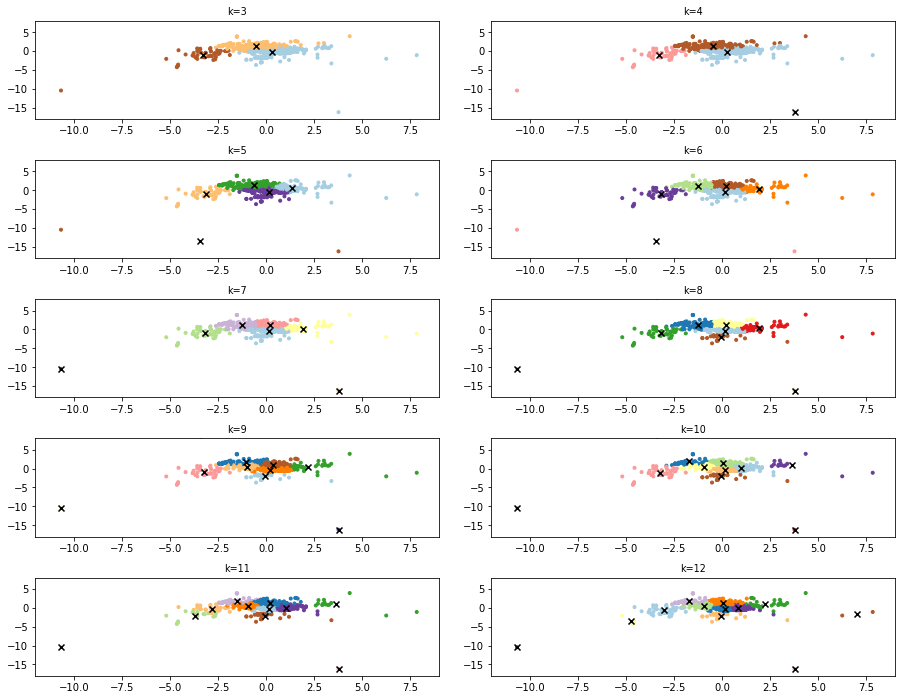

In [18]:
fig,axs = plt.subplots(5,2,figsize=(13,10))
c_xlim=(-12,9)
c_ylim=(-18,8)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
plt.rc('font',size=8)
fig.tight_layout(pad=3.0)
axs[0,0].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans3.labels_, cmap='Paired',marker='.')
axs[0,0].scatter(coyo19_kmeans3.cluster_centers_[:,0] ,coyo19_kmeans3.cluster_centers_[:,1], color='black',marker="x")
axs[0,0].set_title("k=3")
    
axs[0,1].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans4.labels_, cmap='Paired',marker='.')
axs[0,1].scatter(coyo19_kmeans4.cluster_centers_[:,0] ,coyo19_kmeans4.cluster_centers_[:,1], color='black',marker="x")
axs[0,1].set_title("k=4")

axs[1,0].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans5.labels_, cmap='Paired',marker='.')
axs[1,0].scatter(coyo19_kmeans5.cluster_centers_[:,0] ,coyo19_kmeans5.cluster_centers_[:,1], color='black',marker="x")
axs[1,0].set_title("k=5")

axs[1,1].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans6.labels_, cmap='Paired',marker='.')
axs[1,1].scatter(coyo19_kmeans6.cluster_centers_[:,0] ,coyo19_kmeans6.cluster_centers_[:,1], color='black',marker="x")
axs[1,1].set_title("k=6")

axs[2,0].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans7.labels_, cmap='Paired',marker='.')
axs[2,0].scatter(coyo19_kmeans7.cluster_centers_[:,0] ,coyo19_kmeans7.cluster_centers_[:,1], color='black',marker="x")
axs[2,0].set_title("k=7")

axs[2,1].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans8.labels_, cmap='Paired',marker='.')
axs[2,1].scatter(coyo19_kmeans8.cluster_centers_[:,0] ,coyo19_kmeans8.cluster_centers_[:,1], color='black',marker="x")
axs[2,1].set_title("k=8")

axs[3,0].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans9.labels_, cmap='Paired',marker='.')
axs[3,0].scatter(coyo19_kmeans9.cluster_centers_[:,0] ,coyo19_kmeans9.cluster_centers_[:,1], color='black',marker="x")
axs[3,0].set_title("k=9")

axs[3,1].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans10.labels_, cmap='Paired',marker='.')
axs[3,1].scatter(coyo19_kmeans10.cluster_centers_[:,0] ,coyo19_kmeans10.cluster_centers_[:,1], color='black',marker="x")
axs[3,1].set_title("k=10")

axs[4,0].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans11.labels_, cmap='Paired',marker='.')
axs[4,0].scatter(coyo19_kmeans11.cluster_centers_[:,0] ,coyo19_kmeans11.cluster_centers_[:,1], color='black',marker="x")
axs[4,0].set_title("k=11")

axs[4,1].scatter(coyo19_scaled[:,0], coyo19_scaled[:,1], c=coyo19_kmeans12.labels_, cmap='Paired',marker='.')
axs[4,1].scatter(coyo19_kmeans12.cluster_centers_[:,0] ,coyo19_kmeans12.cluster_centers_[:,1], color='black',marker="x")
axs[4,1].set_title("k=12")



# of data points: 1152
cluster perimeter(hull.area): 42.530616564170536
cluster area(hull.volume): 84.26316770142948
------------------------------------------------------
# of data points: 314
cluster perimeter(hull.area): 25.28673111189517
cluster area(hull.volume): 35.37411649775638
------------------------------------------------------
# of data points: 54
cluster perimeter(hull.area): 29.266185715553995
cluster area(hull.volume): 22.22897266287267
------------------------------------------------------


Text(0.5, 1.0, 'k=3')

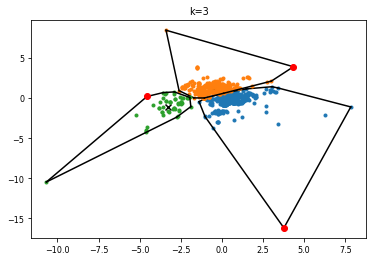

In [19]:
for i in cluster(coyo19_scaled,coyo19_kmeans3.labels_, realClusterNum(coyo19_kmeans3)):
    clusterSize(i)
plt.scatter(coyo19_kmeans3.cluster_centers_[:,0] ,coyo19_kmeans3.cluster_centers_[:,1], color='black',marker="x")
plt.title("k=3")


# of data points: 47
cluster perimeter(hull.area): 8.915621351828591
cluster area(hull.volume): 5.514943441256603
------------------------------------------------------
# of data points: 834
cluster perimeter(hull.area): 3.9371722892518064
cluster area(hull.volume): 1.052126379732279
------------------------------------------------------
# of data points: 131
cluster perimeter(hull.area): 5.407686909588989
cluster area(hull.volume): 2.0978711035721322
------------------------------------------------------
# of data points: 38
cluster perimeter(hull.area): 12.280885883585984
cluster area(hull.volume): 7.263300281323067
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 38
cluster pe

Text(0.5, 1.0, 'k=12')

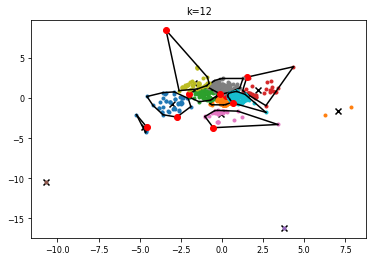

In [20]:
for i in cluster(coyo19_scaled,coyo19_kmeans12.labels_, realClusterNum(coyo19_kmeans12)):
    clusterSize(i)
plt.scatter(coyo19_kmeans12.cluster_centers_[:,0] ,coyo19_kmeans12.cluster_centers_[:,1], color='black',marker="x")
plt.title("k=12")


In [21]:

coyo19k_kmeans3 = KMeans(n_clusters=3)
coyo19k_kmeans3.fit(coyo19king_scaled)

coyo19k_kmeans4 = KMeans(n_clusters=4)
coyo19k_kmeans4.fit(coyo19king_scaled)

coyo19k_kmeans5 = KMeans(n_clusters=5)
coyo19k_kmeans5.fit(coyo19king_scaled)

coyo19k_kmeans6 = KMeans(n_clusters=6)
coyo19k_kmeans6.fit(coyo19king_scaled)

coyo19k_kmeans7 = KMeans(n_clusters=7)
coyo19k_kmeans7.fit(coyo19king_scaled)

coyo19k_kmeans8 = KMeans(n_clusters=8)
coyo19k_kmeans8.fit(coyo19king_scaled)

coyo19k_kmeans9 = KMeans(n_clusters=9)
coyo19k_kmeans9.fit(coyo19king_scaled)

coyo19k_kmeans10 = KMeans(n_clusters=10)
coyo19k_kmeans10.fit(coyo19king_scaled)

coyo19k_kmeans11 = KMeans(n_clusters=11)
coyo19k_kmeans11.fit(coyo19king_scaled)

coyo19k_kmeans12 = KMeans(n_clusters=12)
coyo19k_kmeans12.fit(coyo19king_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'k=12')

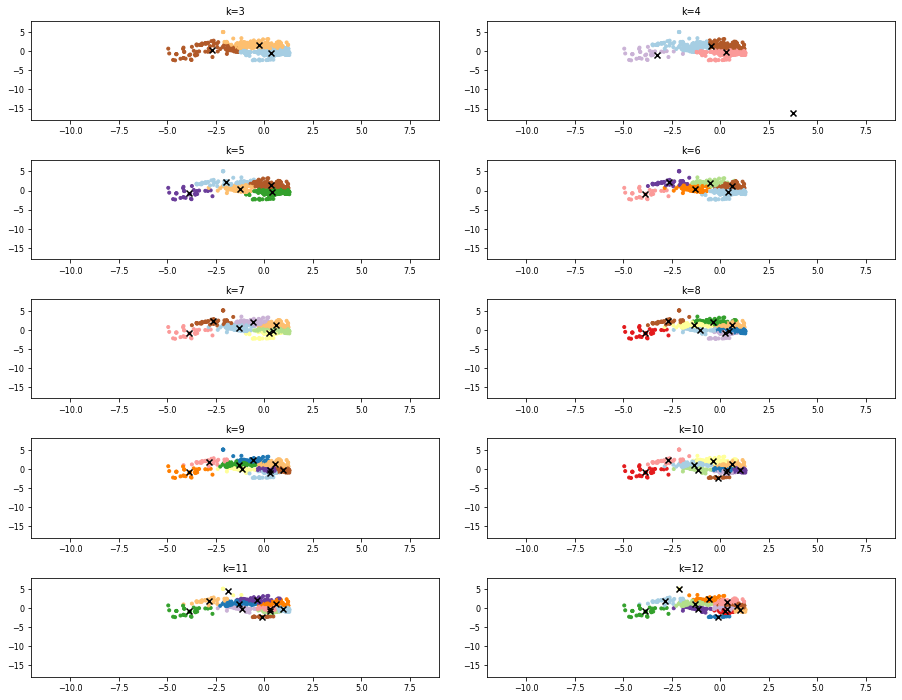

In [22]:
fig,axs = plt.subplots(5,2,figsize=(13,10))
c_xlim=(-12,9)
c_ylim=(-18,8)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
plt.rc('font',size=8)
fig.tight_layout(pad=3.0)
axs[0,0].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans3.labels_, cmap='Paired',marker='.')
axs[0,0].scatter(coyo19k_kmeans3.cluster_centers_[:,0] ,coyo19k_kmeans3.cluster_centers_[:,1], color='black',marker="x")
axs[0,0].set_title("k=3")

axs[0,1].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans4.labels_, cmap='Paired',marker='.')
axs[0,1].scatter(coyo19_kmeans4.cluster_centers_[:,0] ,coyo19_kmeans4.cluster_centers_[:,1], color='black',marker="x")
axs[0,1].set_title("k=4")

axs[1,0].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans5.labels_, cmap='Paired',marker='.')
axs[1,0].scatter(coyo19k_kmeans5.cluster_centers_[:,0] ,coyo19k_kmeans5.cluster_centers_[:,1], color='black',marker="x")
axs[1,0].set_title("k=5")

axs[1,1].scatter(coyo19king_scaled[:,0],coyo19king_scaled[:,1], c=coyo19k_kmeans6.labels_, cmap='Paired',marker='.')
axs[1,1].scatter(coyo19k_kmeans6.cluster_centers_[:,0] ,coyo19k_kmeans6.cluster_centers_[:,1], color='black',marker="x")
axs[1,1].set_title("k=6")

axs[2,0].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans7.labels_, cmap='Paired',marker='.')
axs[2,0].scatter(coyo19k_kmeans7.cluster_centers_[:,0] ,coyo19k_kmeans7.cluster_centers_[:,1], color='black',marker="x")
axs[2,0].set_title("k=7")

axs[2,1].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans8.labels_, cmap='Paired',marker='.')
axs[2,1].scatter(coyo19k_kmeans8.cluster_centers_[:,0] ,coyo19k_kmeans8.cluster_centers_[:,1], color='black',marker="x")
axs[2,1].set_title("k=8")

axs[3,0].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans9.labels_, cmap='Paired',marker='.')
axs[3,0].scatter(coyo19k_kmeans9.cluster_centers_[:,0] ,coyo19k_kmeans9.cluster_centers_[:,1], color='black',marker="x")
axs[3,0].set_title("k=9")

axs[3,1].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans10.labels_, cmap='Paired',marker='.')
axs[3,1].scatter(coyo19k_kmeans10.cluster_centers_[:,0] ,coyo19k_kmeans10.cluster_centers_[:,1], color='black',marker="x")
axs[3,1].set_title("k=10")

axs[4,0].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans11.labels_, cmap='Paired',marker='.')
axs[4,0].scatter(coyo19k_kmeans11.cluster_centers_[:,0] ,coyo19k_kmeans11.cluster_centers_[:,1], color='black',marker="x")
axs[4,0].set_title("k=11")

axs[4,1].scatter(coyo19king_scaled[:,0], coyo19king_scaled[:,1], c=coyo19k_kmeans12.labels_, cmap='Paired',marker='.')
axs[4,1].scatter(coyo19k_kmeans12.cluster_centers_[:,0] ,coyo19k_kmeans12.cluster_centers_[:,1], color='black',marker="x")
axs[4,1].set_title("k=12")

# of data points: 1002
cluster perimeter(hull.area): 9.527466720127054
cluster area(hull.volume): 5.9213669190153
------------------------------------------------------
# of data points: 232
cluster perimeter(hull.area): 12.45538412475387
cluster area(hull.volume): 8.96593832040704
------------------------------------------------------
# of data points: 106
cluster perimeter(hull.area): 13.704299601649886
cluster area(hull.volume): 12.086601956355274
------------------------------------------------------


Text(0.5, 1.0, 'k=3')

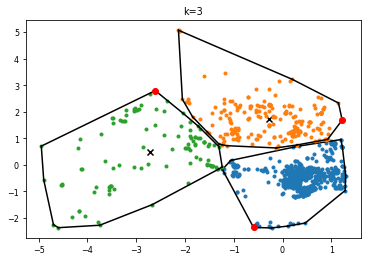

In [23]:
for i in cluster(coyo19king_scaled,coyo19k_kmeans3.labels_, realClusterNum(coyo19k_kmeans3)):
    clusterSize(i)
plt.scatter(coyo19k_kmeans3.cluster_centers_[:,0] ,coyo19k_kmeans3.cluster_centers_[:,1], color='black',marker="x")
plt.title("k=3")

# of data points: 33
cluster perimeter(hull.area): 6.551880216176621
cluster area(hull.volume): 2.4359434022680033
------------------------------------------------------
# of data points: 14
cluster perimeter(hull.area): 2.2706168701572857
cluster area(hull.volume): 0.1597093995091388
------------------------------------------------------
# of data points: 79
cluster perimeter(hull.area): 5.0607960587085605
cluster area(hull.volume): 1.6485850605902668
------------------------------------------------------
# of data points: 32
cluster perimeter(hull.area): 9.151939392690668
cluster area(hull.volume): 5.436584063371337
------------------------------------------------------
# of data points: 100
cluster perimeter(hull.area): 5.134100991922633
cluster area(hull.volume): 1.7371869575254946
------------------------------------------------------
# of data points: 308
cluster perimeter(hull.area): 2.613807518659681
cluster area(hull.volume): 0.4575906889226493
--------------------------------

Text(0.5, 1.0, 'k=12')

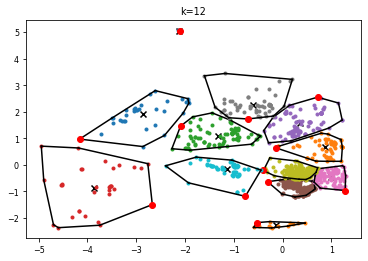

In [24]:
for i in cluster(coyo19king_scaled,coyo19k_kmeans12.labels_, realClusterNum(coyo19k_kmeans12)):
    clusterSize(i)
plt.scatter(coyo19k_kmeans12.cluster_centers_[:,0] ,coyo19k_kmeans12.cluster_centers_[:,1], color='black',marker="x")
plt.title("k=12")

In [25]:
print(coyo19k_kmeans3.cluster_centers_)


[[ 0.35047035 -0.4450816 ]
 [-0.27687944  1.70836475]
 [-2.70693643  0.46821827]]
